## Covid-19 Dataset

Using a small dataset of Covid-19, would perform simple data analysis using pandas 

In [1]:
import pandas as pd

In [23]:
c19 = pd.read_csv('Covid_19_data.csv')

In [3]:
c19

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [4]:
# count of dataset and null value check
c19.count()

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

In [5]:
c19.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

In [6]:
# visualizing the null values in a heatmap using the seaborn library

import seaborn as sns
import matplotlib.pyplot as plt

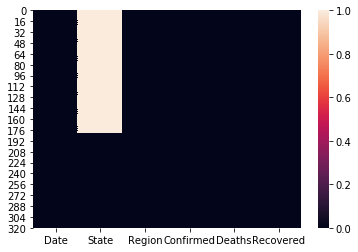

In [7]:
# Visualizing the result of null values 
sns.heatmap(c19.isnull())
plt.show()

The space in the graph shows that there are null values in the state column from 0 too 181

##### Answering Analytical Questions for Insights

1. Show the number of confirmed, deaths and recovered cases in each region

In [8]:
c19.groupby('Region').sum()

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
...,...,...,...
West Bank and Gaza,344,2,71
Western Sahara,6,0,5
Yemen,6,0,1


2. Remove all the records where Confirmed cases is less than 10

In [9]:
c19.head(2)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455


In [10]:
# view the data with confirmed cases less than 10
c19[c19.Confirmed < 10]

,Date,State,Region,Confirmed,Deaths,Recovered
18,4/29/2020,NaN,Bhutan,7,0,5
98,4/29/2020,NaN,MS Zaandam,9,2,0
105,4/29/2020,NaN,Mauritania,8,1,6
126,4/29/2020,NaN,Papua New Guinea,8,0,0
140,4/29/2020,NaN,Sao Tome and Principe,8,0,4
177,4/29/2020,NaN,Western Sahara,6,0,5
178,4/29/2020,NaN,Yemen,6,0,1
184,4/29/2020,Anguilla,UK,3,0,3
192,4/29/2020,"Bonaire, Sint Eustatius and Saba",Netherlands,5,0,0
194,4/29/2020,British Virgin Islands,UK,6,1,3


In [11]:
# remove the data with confirmed cases less than 10

c19 = c19[~(c19.Confirmed < 10)]

3. In which region, maximum number of confirmed  cases were recorded?

In [12]:
#grouping the confirmed cases by region

c19.groupby('Region').Confirmed.sum()

Region
Afghanistan           1939
Albania                766
Algeria               3848
Andorra                743
Angola                  27
                      ... 
Venezuela              331
Vietnam                270
West Bank and Gaza     344
Zambia                  97
Zimbabwe                32
Name: Confirmed, Length: 180, dtype: int64

In [13]:
# Sorting in Descending order to fined the region with highest confimed cases

c19.groupby('Region').Confirmed.sum().sort_values(ascending = False).head(3)

Region
US       1039909
Spain     236899
Italy     203591
Name: Confirmed, dtype: int64

4. Which Region had the Minimum number of Deaths recorded

In [14]:
c19.head(3)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702


In [15]:
c19.groupby('Region').Deaths.sum()

Region
Afghanistan            60
Albania                30
Algeria               444
Andorra                42
Angola                  2
                     ... 
Venezuela              10
Vietnam                 0
West Bank and Gaza      2
Zambia                  3
Zimbabwe                4
Name: Deaths, Length: 180, dtype: int64

In [16]:
# sorting in ascending order to find the minimum
c19.groupby('Region').Deaths.sum().sort_values(ascending = True).head(50)

Region
Cambodia                            0
Seychelles                          0
Saint Lucia                         0
Central African Republic            0
Saint Kitts and Nevis               0
South Sudan                         0
Rwanda                              0
Grenada                             0
Macau                               0
Madagascar                          0
Nepal                               0
Namibia                             0
Saint Vincent and the Grenadines    0
Mozambique                          0
Holy See                            0
Timor-Leste                         0
Mongolia                            0
Uganda                              0
Laos                                0
Eritrea                             0
Vietnam                             0
Fiji                                0
Dominica                            0
Gambia                              1
Equatorial Guinea                   1
Eswatini                            1
Cabo 

5. How many confirmed deaths and recovered cases were reported from india till 29th April 2020?

In [17]:
c19[c19.Region == 'India']

,Date,State,Region,Confirmed,Deaths,Recovered
74,4/29/2020,NaN,India,33062,1079,8437


In [24]:
c19[c19.Region == 'Yemen']

,Date,State,Region,Confirmed,Deaths,Recovered
178,4/29/2020,NaN,Yemen,6,0,1


In [19]:
c19[c19.Region == 'US']

,Date,State,Region,Confirmed,Deaths,Recovered
181,4/29/2020,Alabama,US,6912,256,0
182,4/29/2020,Alaska,US,355,9,0
186,4/29/2020,Arizona,US,7209,308,0
187,4/29/2020,Arkansas,US,3193,57,0
195,4/29/2020,California,US,48747,1946,0
199,4/29/2020,Colorado,US,14758,766,0
200,4/29/2020,Connecticut,US,26767,2169,0
202,4/29/2020,Delaware,US,4655,144,0
204,4/29/2020,Diamond Princess cruise ship,US,49,0,0
205,4/29/2020,District of Columbia,US,4106,205,0


6a. Sort the entire data with respect to No. of Confirmed cases in ascending order

In [20]:
c19.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [21]:
c19.sort_values( by = ['Confirmed'])

,Date,State,Region,Confirmed,Deaths,Recovered
156,4/29/2020,NaN,Suriname,10,1,8
70,4/29/2020,NaN,Holy See,10,0,2
59,4/29/2020,NaN,Gambia,10,1,8
318,4/29/2020,Yukon,Canada,11,0,0
217,4/29/2020,Greenland,Denmark,11,0,11
...,...,...,...,...,...,...
57,4/29/2020,NaN,France,165093,24087,48228
168,4/29/2020,NaN,UK,165221,26097,0
80,4/29/2020,NaN,Italy,203591,27682,71252
153,4/29/2020,NaN,Spain,236899,24275,132929


6b. Sort the entire data wrt No. of Recovered cases in descending order

In [22]:
c19.sort_values( by = ['Recovered'], ascending = False)

,Date,State,Region,Confirmed,Deaths,Recovered
153,4/29/2020,NaN,Spain,236899,24275,132929
61,4/29/2020,NaN,Germany,161539,6467,120400
76,4/29/2020,NaN,Iran,93657,5957,73791
80,4/29/2020,NaN,Italy,203591,27682,71252
229,4/29/2020,Hubei,Mainland China,68128,4512,63616
...,...,...,...,...,...,...
258,4/29/2020,Nevada,US,4934,230,0
257,4/29/2020,Nebraska,US,3851,56,0
255,4/29/2020,Montana,US,451,16,0
254,4/29/2020,Missouri,US,7660,338,0
